In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Time parameters
simulation_time_steps = 100  # Number of time steps to simulate
time_step_duration = 0.1  # Duration of each time step
time_points = np.arange(0, simulation_time_steps * time_step_duration, time_step_duration)

# Initialize variables with descriptive names
population = np.zeros_like(time_points)  # Population
energy_level = np.zeros_like(time_points)  # Energy level
technology_level = np.zeros_like(time_points)  # Technological advancement
resource_availability = np.zeros_like(time_points)  # Resource availability
risk_factor = np.zeros_like(time_points)  # Risk factor
survivability_probability = np.zeros_like(time_points)  # Survivability probability

# Initial conditions
initial_population = 1000  # Initial population size
initial_energy_level = 1  # Initial energy level
initial_technology_level = 1  # Initial technology level
initial_resource_availability = 1000  # Initial resource availability
initial_risk_factor = 0.01  # Initial risk factor
initial_survivability = 1  # Initial survivability (100%)

population[0] = initial_population
energy_level[0] = initial_energy_level
technology_level[0] = initial_technology_level
resource_availability[0] = initial_resource_availability
risk_factor[0] = initial_risk_factor
survivability_probability[0] = initial_survivability

# Model parameters with descriptive names
energy_growth_rate_from_technology = 0.01
energy_reduction_due_to_risk = 0.001
technology_growth_rate_from_population = 0.005
technology_reduction_due_to_risk = 0.0001
resource_depletion_rate_due_to_energy = 0.01
risk_scaling_factor_with_energy = 0.0001

# Simulation loop with updated variable names
for t in range(1, len(time_points)):
    # Energy level dynamics
    energy_change_rate = (
        energy_growth_rate_from_technology * technology_level[t - 1]
        - energy_reduction_due_to_risk * risk_factor[t - 1]
    )
    energy_level[t] = energy_level[t - 1] + energy_change_rate * time_step_duration

    # Technology level dynamics
    technology_change_rate = (
        technology_growth_rate_from_population * population[t - 1]
        - technology_reduction_due_to_risk * risk_factor[t - 1]
    )
    technology_level[t] = technology_level[t - 1] + technology_change_rate * time_step_duration

    # Resource availability dynamics
    resource_change_rate = -resource_depletion_rate_due_to_energy * energy_level[t - 1]
    resource_availability[t] = resource_availability[t - 1] + resource_change_rate * time_step_duration

    # Risk factor dynamics
    risk_factor[t] = risk_scaling_factor_with_energy * energy_level[t - 1] ** 2

    # Survivability probability dynamics
    survivability_probability[t] = (
        survivability_probability[t - 1] * np.exp(-risk_factor[t] * time_step_duration)
    )

    # Population dynamics (optional decline based on survivability)
    if survivability_probability[t] < 0.1:
        population[t] = population[t - 1] * 0.99  # Decline population when survivability is low
    else:
        population[t] = population[t - 1]  # Keep population constant for now




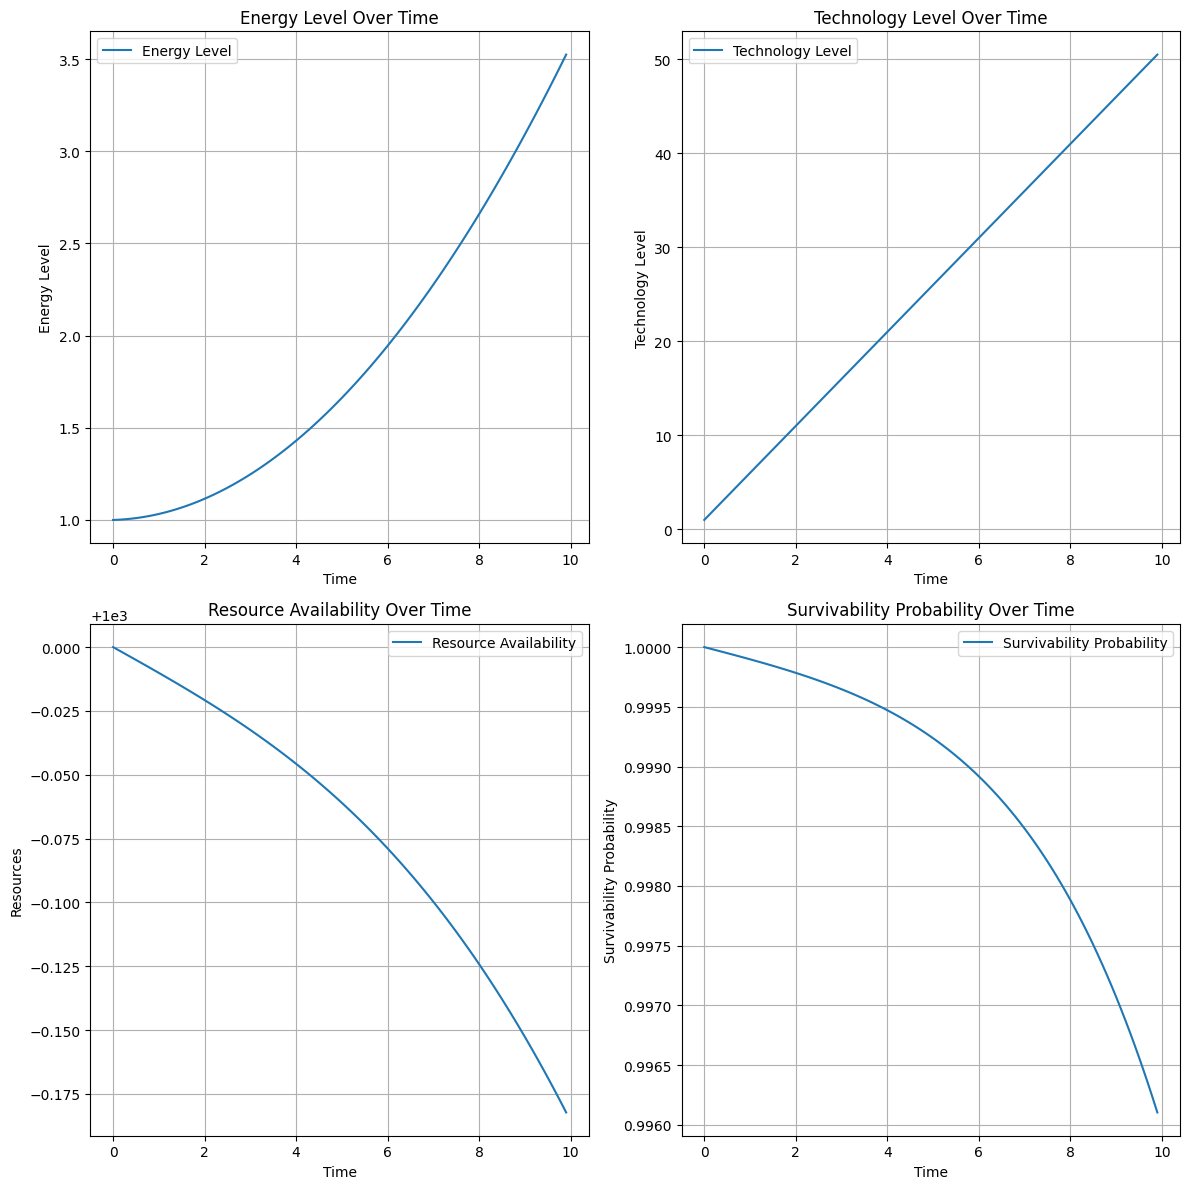

In [6]:
# Plot each variable on a separate chart for better clarity
plt.figure(figsize=(12, 12))

# Energy Level
plt.subplot(2, 2, 1)
plt.plot(time_points, energy_level, label="Energy Level")
plt.xlabel("Time")
plt.ylabel("Energy Level")
plt.title("Energy Level Over Time")
plt.grid(True)
plt.legend()

# Technology Level
plt.subplot(2, 2, 2)
plt.plot(time_points, technology_level, label="Technology Level")
plt.xlabel("Time")
plt.ylabel("Technology Level")
plt.title("Technology Level Over Time")
plt.grid(True)
plt.legend()

# Resource Availability
plt.subplot(2, 2, 3)
plt.plot(time_points, resource_availability, label="Resource Availability")
plt.xlabel("Time")
plt.ylabel("Resources")
plt.title("Resource Availability Over Time")
plt.grid(True)
plt.legend()

# Survivability Probability
plt.subplot(2, 2, 4)
plt.plot(time_points, survivability_probability, label="Survivability Probability")
plt.xlabel("Time")
plt.ylabel("Survivability Probability")
plt.title("Survivability Probability Over Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
